In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("data.xlsx")

Bar Chart of Security Mentions by LLM

• Description: Create a bar chart showing the number of times each LLM mentioned 
security concerns across the 150 Stack Overflow questions. Steps: 

1. Load the data into a Pandas DataFrame.

2. Group the data by LLM and count the number of security mentions. 

3. Use Matplotlib to create a bar chart with LLM models on the x-axis and the number of security mentions on the y-axis

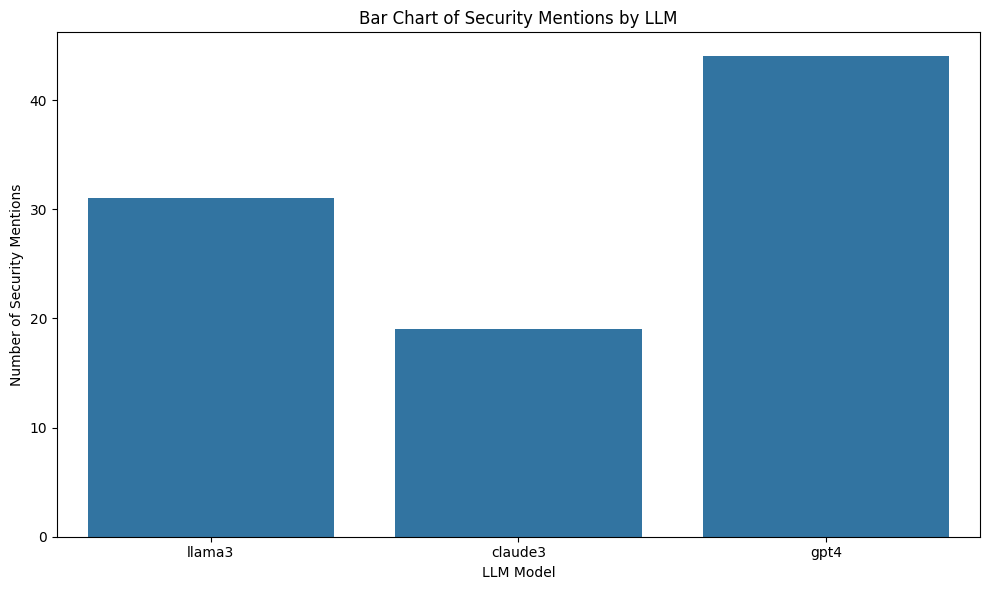

In [63]:
security_mentions = {
    'llama3': df['llama3_security_mention'].sum(),
    'claude3': df['claude3_security_mention'].sum(),
    'gpt4': df['gpt4_security_mention'].sum()
}

security_mentions_df = pd.DataFrame(list(security_mentions.items()), columns=['LLM', 'Security Mentions'])

plt.figure(figsize=(10, 6))
sns.barplot(x='LLM', y='Security Mentions', data=security_mentions_df)
plt.xlabel('LLM Model')
plt.ylabel('Number of Security Mentions')
plt.title('Bar Chart of Security Mentions by LLM')
plt.tight_layout()
plt.show()


Stacked Bar Chart for Causes, Exploits, and Fixes
Description: Create a stacked bar chart showing the number of times each LLM provided information about the causes, potential exploits, and fixes of the vulnerabilities. Steps:

1. Group the data by LLM and sum the counts for causes, exploits, and fixes.
2. Use Matplotlib to create a stacked bar chart with LLM models on the x-axis and counts of mentions on the y-axis. Stack the bars for causes, exploits, and fixes

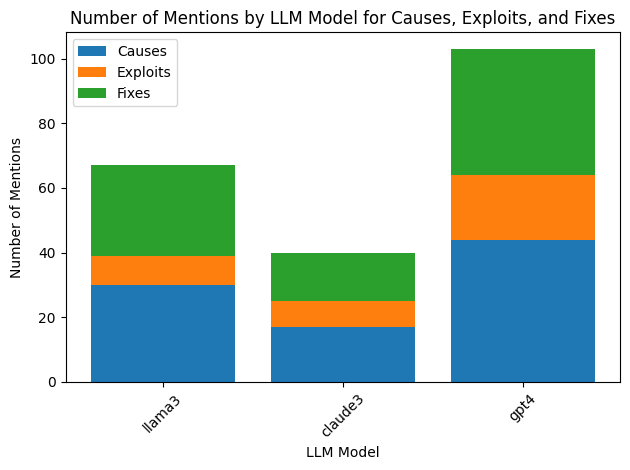

In [66]:
data = {
    'llama3': {
        'causes': df['llama3_causes'].sum(),
        'exploits': df['llama3_exploits'].sum(),
        'fixes': df['llama3_fixes'].sum()
    },
    'claude3': {
        'causes': df['claude3_causes'].sum(),
        'exploits': df['claude3_exploits'].sum(),
        'fixes': df['claude3_fixes'].sum()
    },
    'gpt4': {
        'causes': df['gpt4_causes'].sum(),
        'exploits': df['gpt4_exploits'].sum(),
        'fixes': df['gpt4_fixes'].sum()
    }
}

data_df = pd.DataFrame(data).T.reset_index().rename(columns={'index': 'LLM'})

plt.bar(data_df['LLM'], data_df['causes'], label='Causes')
plt.bar(data_df['LLM'], data_df['exploits'], bottom=data_df['causes'], label='Exploits')
plt.bar(data_df['LLM'], data_df['fixes'], bottom=data_df['causes'] + data_df['exploits'], label='Fixes')

plt.xlabel('LLM Model')
plt.ylabel('Number of Mentions')
plt.title('Stacked Bar Chart for Causes, Exploits, and Fixes')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()